<a href="https://colab.research.google.com/github/SpectraGbes/Spectragbes/blob/main/Henry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [37]:
import plotly.express as px

In [38]:
import tensorflow.compat.v1 as tf1

In [39]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [40]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [41]:
dftrain=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [42]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [43]:
numeric_columns = dftrain.select_dtypes(include=['number']).columns
df_numeric = dftrain[numeric_columns]

px.imshow(df_numeric.corr(), text_auto=True)

In [44]:
y_train=dftrain['survived']
y_eval=dfeval['survived']
dftrain=dftrain.drop(columns=['survived'])
dfeval=dfeval.drop(columns=['survived'])

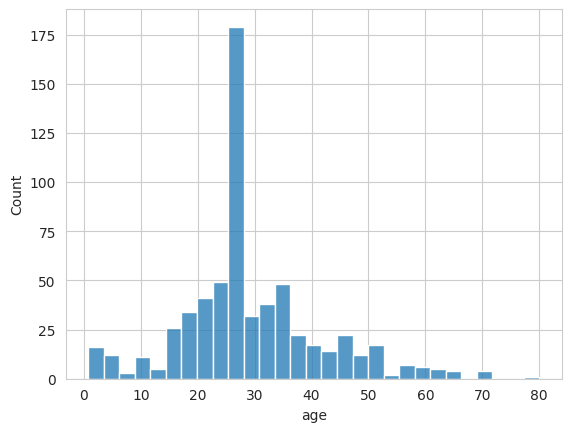

In [45]:
sns.set_style('whitegrid')
sns.histplot(dftrain['age'])
plt.show()

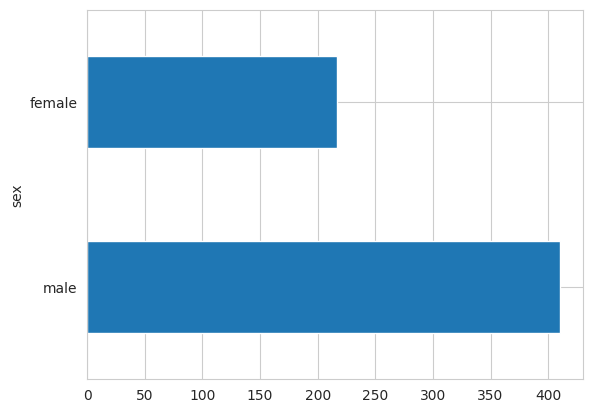

In [46]:
dftrain.sex.value_counts().plot(kind='barh')
plt.show()

<Axes: ylabel='class'>

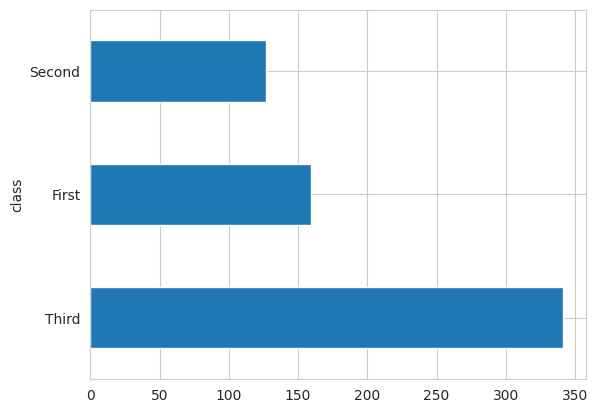

In [47]:
dftrain['class'].value_counts().plot(kind='barh')

In [48]:
a=pd.DataFrame()
a['sex']=dftrain['sex']
a['survived']=y_train

In [49]:
a.head()

,sex,survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


<Axes: ylabel='sex'>

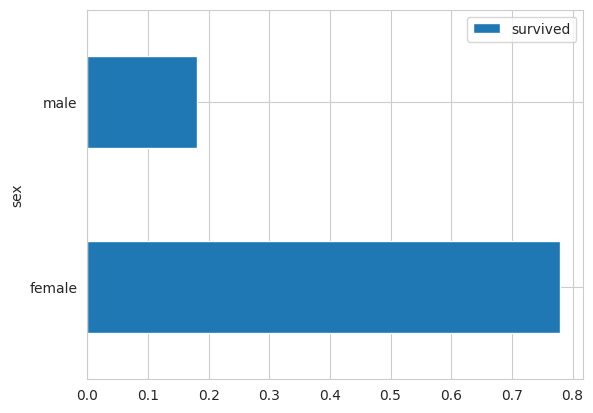

In [50]:
a.groupby(['sex']).mean().plot(kind='barh')

In [51]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS :
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))
for feature_name in NUMERIC_COLUMNS :
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [52]:
def make_input_fn(data_df , label_df , num_epochs =10 , shuffle= True , batch_size =32):
    def input_function ():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle :
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_input_fn= make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [57]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)

AttributeError: module 'tensorflow' has no attribute 'estimator'

In [56]:
linear_est.train(train_input_fn)
result=linear_est.evaluate(eval_input_fn)
print(result['accuracy'])

NameError: name 'linear_est' is not defined